# **Ozone layer classification**

### Importing Datasets And Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB

### Understanding notations ###

In [3]:
notations = pd.read_csv('eighthr.names', header=None)
notations.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'eighthr.names'

1. Title: Ozone Level Detection


2. Source:

Kun Zhang
zhang.kun05 '@' gmail.com
Department of Computer Science,
Xavier University of Lousiana

Wei Fan
wei.fan '@' gmail.com
IBM T.J.Watson Research

XiaoJing Yuan
xyuan '@' uh.edu
Engineering Technology Department,
College of Technology, University of Houston


3. Past Usage:

Forecasting skewed biased stochastic ozone days: analyses, solutions and beyond, Knowledge and Information Systems, Vol. 14, No. 3, 2008.
Discusses details about the dataset, its use as well as various experiments (both cross-validation and streaming) using many state-of-the-art methods.

A shorter version of the paper (does not contain some detailed experiments as the journal paper above) is in:
Forecasting Skewed Biased Stochastic Ozone Days: Analyses and Solutions. ICDM 2006: 753-764


4. Relevant Information:

The following are specifications for several most important attributes
that are highly valued by Texas Commission on Environmental Quality (TCEQ).
More details can be found in the two relevant papers.

-- O 3 - Local ozone peak prediction
-- Upwind - Upwind ozone background level

-- EmFactor - Precursor emissions related factor

-- Tmax - Maximum temperature in degrees F

-- Tb - Base temperature where net ozone production begins (50 F)

-- SRd - Solar radiation total for the day

-- WSa - Wind speed near sunrise (using 09-12 UTC forecast mode)

-- WSp - Wind speed mid-day (using 15-21 UTC forecast mode)



5. Number of Instances: 2536


6. Number of Attributes: 73


7. Attribute Information:

1,0 | two classes 1: ozone day, 0: normal day

Date:     ignore.
WSR0:     continuous.
WSR1:     continuous.
WSR2:     continuous.
WSR3:     continuous.
WSR4:     continuous.
WSR5:     continuous.
WSR6:     continuous.
WSR7:     continuous.
WSR8:     continuous.
WSR9:     continuous.
WSR10:     continuous.
WSR11:     continuous.
WSR12:     continuous.
WSR13:     continuous.
WSR14:     continuous.
WSR15:     continuous.
WSR16:     continuous.
WSR17:     continuous.
WSR18:     continuous.
WSR19:     continuous.
WSR20:     continuous.
WSR21:     continuous.
WSR22:     continuous.
WSR23:     continuous.
WSR_PK:     continuous.
WSR_AV:     continuous.
T0:     continuous.
T1:     continuous.
T2:     continuous.
T3:     continuous.
T4:     continuous.
T5:     continuous.
T6:     continuous.
T7:     continuous.
T8:     continuous.
T9:     continuous.
T10:     continuous.
T11:     continuous.
T12:     continuous.
T13:     continuous.
T14:     continuous.
T15:     continuous.
T16:     continuous.
T17:     continuous.
T18:     continuous.
T19:     continuous.
T20:     continuous.
T21:     continuous.
T22:     continuous.
T23:     continuous.
T_PK:     continuous.
T_AV:     continuous.
T85:     continuous.
RH85:     continuous.
U85:     continuous.
V85:     continuous.
HT85:     continuous.
T70:     continuous.
RH70:     continuous.
U70:     continuous.
V70:     continuous.
HT70:     continuous.
T50:     continuous.
RH50:     continuous.
U50:     continuous.
V50:     continuous.
HT50:     continuous.
KI:     continuous.
TT:     continuous.
SLP:     continuous.
SLP_:     continuous.
Precp:    continuous.


### **Reading csv file and cleaning data**

In [80]:
data = pd.read_csv('eighthr.data',header=None)

In [81]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [82]:
data.drop([0],axis=1,inplace=True)

In [83]:
data

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


**Replacing "?" with nan**

In [84]:
for i in data.columns:
    data[i] = data[i].replace('?',np.nan)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       2235 non-null   object 
 1   2       2242 non-null   object 
 2   3       2240 non-null   object 
 3   4       2242 non-null   object 
 4   5       2241 non-null   object 
 5   6       2242 non-null   object 
 6   7       2243 non-null   object 
 7   8       2245 non-null   object 
 8   9       2244 non-null   object 
 9   10      2247 non-null   object 
 10  11      2246 non-null   object 
 11  12      2242 non-null   object 
 12  13      2247 non-null   object 
 13  14      2246 non-null   object 
 14  15      2246 non-null   object 
 15  16      2248 non-null   object 
 16  17      2250 non-null   object 
 17  18      2251 non-null   object 
 18  19      2248 non-null   object 
 19  20      2242 non-null   object 
 20  21      2240 non-null   object 
 21  22      2241 non-null   object 
 22  

In [86]:
data.describe()

,73
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Replacing missing values with mean**

In [87]:
from sklearn.impute import SimpleImputer

In [88]:
for i in data.columns[:-1]:
  data[i] = data[i].astype(float)

In [89]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [90]:
data_imputed

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.070000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.000000,65.000000,0.00,0.0
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.040000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.000000,15.000000,0.00,0.0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.060000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.000000,-35.000000,0.00,0.0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.250000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.000000,-30.000000,0.05,0.0


**Creating x and y variables to use in the model**

### Splitting data into train and test set

In [91]:
x = data_imputed.drop([73], axis=1)
y = data_imputed[73]

In [92]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.25, random_state=42)

In [93]:
xtrain

,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
1893,0.400000,0.200000,0.10000,0.200000,0.400000,0.300000,0.100000,1.200000,3.200000,4.400000,...,-18.20000,0.140000,17.550000,-19.490000,5685.000000,-11.600000,27.600000,10285.000000,30.000000,0.00
1165,0.400000,0.300000,0.80000,1.800000,1.500000,1.400000,1.700000,1.500000,1.700000,1.700000,...,-17.80000,0.590000,17.630000,-8.270000,5735.000000,7.900000,40.200000,10160.000000,-5.000000,0.03
1851,1.640179,1.586351,1.54558,1.526405,1.522624,1.542417,1.637896,2.047127,2.539037,2.847708,...,-17.70000,0.190000,23.890000,-6.810000,5665.000000,-15.500000,32.700000,10195.000000,90.000000,0.00
2307,0.600000,1.000000,1.00000,0.900000,0.800000,0.400000,0.600000,1.700000,2.000000,2.700000,...,-10.51141,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10195.000000,10.000000,0.00
366,1.700000,1.600000,1.50000,1.600000,1.400000,1.400000,1.900000,2.100000,2.000000,3.300000,...,-16.20000,0.490000,16.420000,-4.400000,5755.000000,34.800000,51.200000,10210.000000,-50.000000,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.640179,1.586351,1.54558,1.526405,1.522624,1.542417,1.637896,2.047127,2.539037,2.847708,...,-7.30000,0.690000,2.950000,0.350000,5890.000000,39.500000,49.800000,10130.000000,-20.000000,0.00
1095,3.000000,3.000000,3.10000,4.600000,2.400000,1.700000,2.400000,3.000000,3.200000,3.600000,...,-12.40000,0.560000,18.230000,3.950000,5795.000000,-29.500000,16.900000,10220.000000,10.000000,0.18
1130,5.500000,4.700000,4.20000,4.100000,3.500000,4.000000,3.900000,4.000000,3.700000,3.900000,...,-12.90000,0.210000,27.210000,4.890000,5785.000000,-34.600000,22.800000,10240.000000,130.000000,0.00
1294,0.900000,1.200000,0.90000,1.000000,1.200000,1.300000,1.100000,2.200000,2.400000,2.400000,...,-4.90000,0.150000,-3.460000,2.020000,5935.000000,22.900000,38.300000,10165.000000,0.000000,0.00


## CLASSIFICATION MODELS

### Random forest classifier

**Training model**

In [94]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(xtrain, ytrain )

RandomForestClassifier(max_depth=2, random_state=0)

**Prediction on Test Data**

In [95]:
ypredict_rfc = rf.predict(xtest)

**Accuracy Score of the model**

In [96]:
accuracy_score(ytest, ypredict_rfc)

0.9369085173501577

### K nearest neighbors

**Training the model**

In [97]:
reg= KNeighborsClassifier(n_neighbors=7)
reg.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

**Prediction on test data**

In [98]:
ypredict_knn = reg.predict(xtest)

**Accuracy score of model**

In [99]:
accuracy_score(ytest, ypredict_knn)

0.9353312302839116

### Descision Tree Classifier

**Training the model**

In [100]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=0)

**Prediction on Test Data**

In [101]:
ypredict_dtc = tree.predict(xtest)

**Accuracy of the model**

In [102]:
accuracy_score(ytest, ypredict_dtc)

0.8990536277602523

### Ridge classifier

**Training the model**

In [103]:
clf = RidgeClassifier()
clf.fit(xtrain, ytrain)

RidgeClassifier()

**Prediction on test data**

In [104]:
ypredict_ridge = clf.predict(xtest)

**Accuracy of the model**

In [105]:
accuracy_score(ytest, ypredict_ridge)

0.9369085173501577

### Naive bayes classifier

**Training the model**

In [106]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

**Prediction on test data**

In [107]:
ypredict_gnb = gnb.predict(xtest)

**Accuracy of the model**

In [108]:
accuracy_score(ytest, ypredict_gnb)

0.7018927444794952

## DATA VIZUALIZATION ##

In [109]:


data_imputed = pd.read_csv('eighthr.data', header=None)
for i in data.columns[:-1]:
  data[i] = data[i].astype(float)

  imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

x = data_imputed.drop([73], axis=1)
y = data_imputed[73]

# Prepare features and target variable
x = data_imputed.drop([73], axis=1)  # Dropping target column
y = data_imputed[73]  # Target variable

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

# List of models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(max_depth=2, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Ridge Classifier": RidgeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(xtrain, ytrain)  # Fit the model
    ypredict = model.predict(xtest)  # Make predictions
    accuracy = accuracy_score(ytest, ypredict)  # Calculate accuracy
    print(f'Accuracy of {name}: {accuracy:.5f}')

Accuracy of Decision Tree: 0.89905
Accuracy of Random Forest: 0.93691
Accuracy of K-Nearest Neighbors: 0.93533
Accuracy of Ridge Classifier: 0.93691
Accuracy of Naive Bayes: 0.70189



Classification Report for Decision Tree:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       594
         1.0       0.21      0.23      0.22        40

    accuracy                           0.90       634
   macro avg       0.58      0.58      0.58       634
weighted avg       0.90      0.90      0.90       634



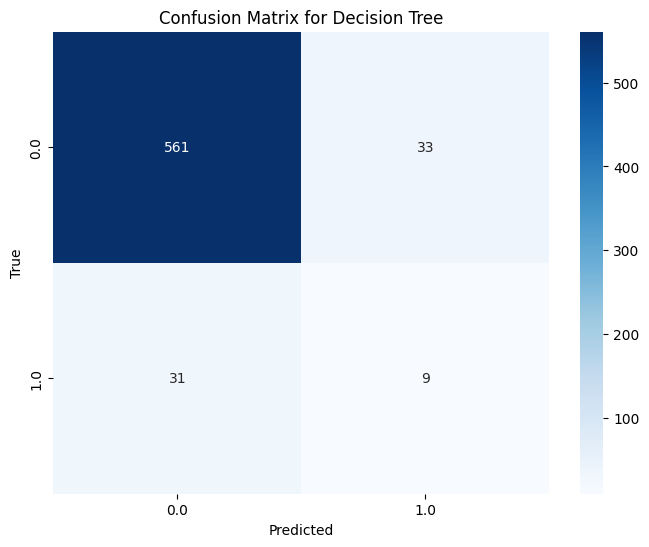


Classification Report for Random Forest:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       594
         1.0       0.00      0.00      0.00        40

    accuracy                           0.94       634
   macro avg       0.47      0.50      0.48       634
weighted avg       0.88      0.94      0.91       634



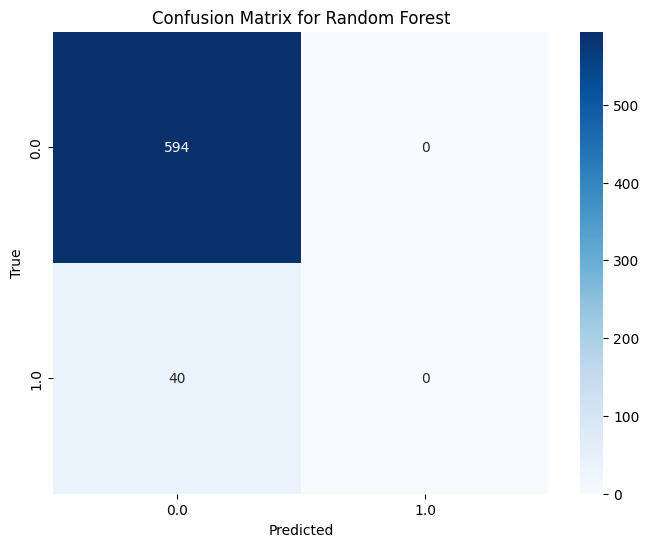


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       594
         1.0       0.33      0.03      0.05        40

    accuracy                           0.94       634
   macro avg       0.64      0.51      0.51       634
weighted avg       0.90      0.94      0.91       634



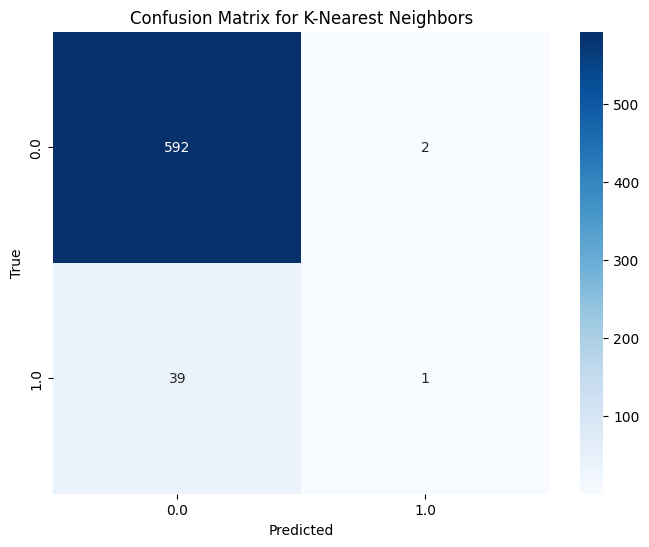


Classification Report for Ridge Classifier:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       594
         1.0       0.00      0.00      0.00        40

    accuracy                           0.94       634
   macro avg       0.47      0.50      0.48       634
weighted avg       0.88      0.94      0.91       634



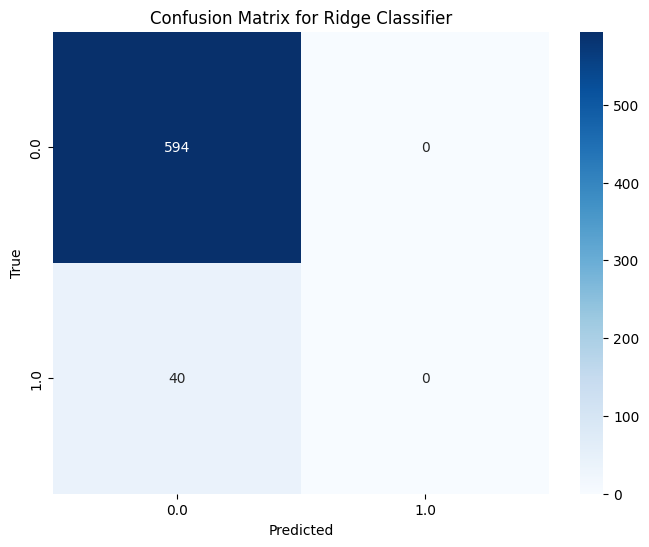


Classification Report for Naive Bayes:

              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81       594
         1.0       0.16      0.85      0.26        40

    accuracy                           0.70       634
   macro avg       0.57      0.77      0.54       634
weighted avg       0.93      0.70      0.78       634



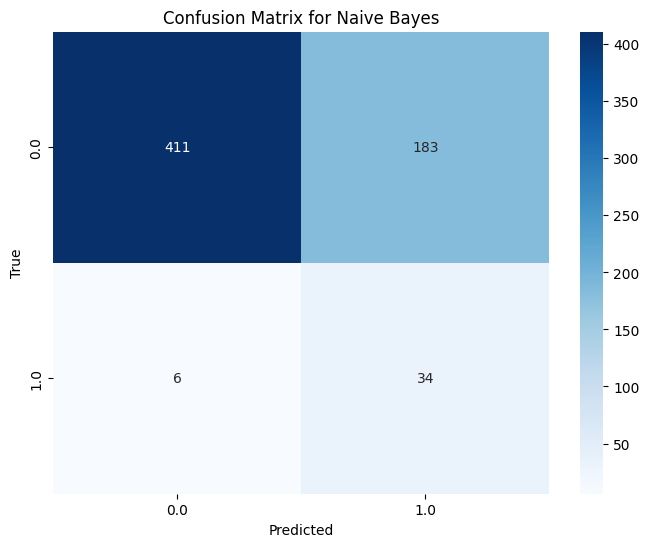

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

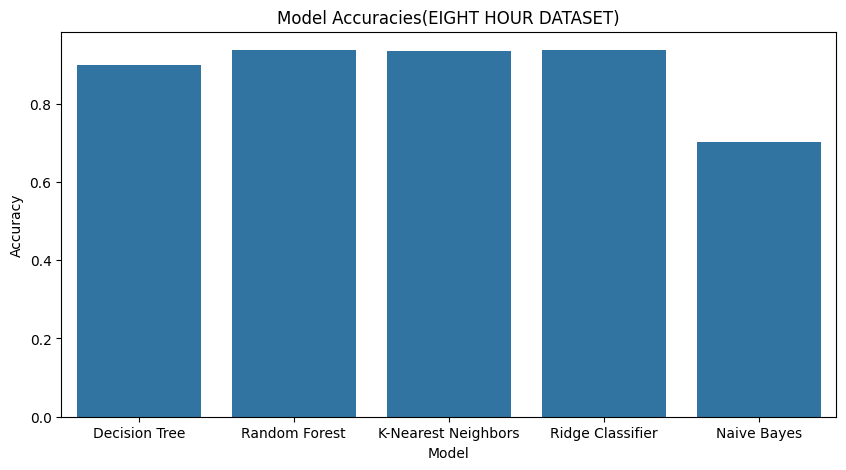

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
data_imputed = pd.read_csv('eighthr.data', header=None)
for i in data.columns[:-1]:
  data[i] = data[i].astype(float)

  imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

x = data_imputed.drop([73], axis=1)
y = data_imputed[73]

# Prepare features and target variable
x = data_imputed.drop([73], axis=1)  # Dropping target column
y = data_imputed[73]  # Target variable

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

models = {
   "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(max_depth=2, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Ridge Classifier": RidgeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model to the training data
    model.fit(xtrain, ytrain)

    # Make predictions on the test data
    ypredict = model.predict(xtest)

    # Generate the classification report
    print(f'\nClassification Report for {name}:\n')
    print(classification_report(ytest, ypredict,zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(ytest, ypredict)

    # Visualization of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

accuracies = {}

# Calculate and store accuracy scores for each model
for name, model in models.items():
    ypredict = model.predict(xtest)
    accuracies[name] = accuracy_score(ytest, ypredict)
    plt.figure()
# Visualization of model accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracies(EIGHT HOUR DATASET)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()
